# Intorduction

Use q-factor returns (monthly) to find principal components up to 8.

First Sample
* 1980/01 ~ 2021/12
* Use all factors available during this period

Second Sample
* 2000/01 ~ 2021/12
* Use all factors available during this period
* Use all factors only used in the first sample

Compute the correlations between each of 8 components and 6 popular factors
* Fama-French 5 factors and Momentum Factor

Identify which factors seem most important to capture anomalies in stock markets

# Setting

## Load Library

In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package

import matplotlib.pyplot as plt # python's plotting package
import seaborn as sns

import itertools
from functools import reduce
from datetime import datetime
from tqdm.notebook import tqdm

import statsmodels.api as sm # module for OLS
from sklearn.metrics import mean_squared_error as mse

import pandas_datareader.data as web  # module for reading datasets directly from the web
import pandas_datareader.famafrench as ff 

# PCA packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load Anomaly Data Set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -qq '/content/drive/MyDrive/UNIST/인공지능을 활용한 금융시장 분석/data/fric_monthly_2021.zip'
!unzip -qq '/content/drive/MyDrive/UNIST/인공지능을 활용한 금융시장 분석/data/intan_monthly_2021.zip'
!unzip -qq '/content/drive/MyDrive/UNIST/인공지능을 활용한 금융시장 분석/data/inv_monthly_2021.zip'
!unzip -qq '/content/drive/MyDrive/UNIST/인공지능을 활용한 금융시장 분석/data/mom_monthly_2021.zip'
!unzip -qq '/content/drive/MyDrive/UNIST/인공지능을 활용한 금융시장 분석/data/prof_monthly_2021.zip'
!unzip -qq '/content/drive/MyDrive/UNIST/인공지능을 활용한 금융시장 분석/data/vvg_monthly_2021.zip'

In [4]:
base_path = '/content'
save_path = '/content/drive/MyDrive/UNIST/인공지능을 활용한 금융시장 분석/data'

In [5]:
# ReadAnomaly reads csv files that contain anomaly portfolios from Google Drive
def ReadAnomaly(input_fn, var_nm):
  # Load csv files 
  filename = input_fn
  
  df = pd.read_csv(filename)
  df['day'] = 1
  df['date'] = pd.to_datetime(df[['year','month','day']]) # date in datetime format
  max_rank = df.iloc[:, 2].max() # portfolios may have different numbers of groups.
  min_rank = df.iloc[:, 2].min() # portfolios may have different numbers of groups.
  
  df_high = df[df.iloc[:, 2]==max_rank]
  df_low  = df[df.iloc[:, 2]==min_rank]
  df_hml = pd.merge(df_high.drop(columns=['year','month','day','nstocks']),df_low.drop(columns=['year','month','day','nstocks']),on='date')

  # Define high-minus-low portfolio
  df_hml[var_nm] = df_hml['ret_vw_x'] - df_hml['ret_vw_y']
  #print(var_nm, 'portfolio has been created!')
  
  return df_hml[['date', var_nm]] # keep only date and return

In [6]:
def merge_character(list_characteristics, save_file_name, save=False):
  # group 1: momentum

  # create date file
  base_file = pd.DataFrame(columns = ['year','month','day'])
  for year in range(1980,2021+1):
    for month in range(1,12+1):
      base_file.loc[len(base_file)] = [year, month, 1]

  base_file['date'] = pd.to_datetime(base_file[['year','month','day']])
  base_file.drop(columns=['year','month','day'],inplace=True)

  # run ReadAnomaly
  for char in tqdm(list_characteristics):
    input_fn = base_path + '/portf_' + char + '_monthly_2021.csv'
    base_file = pd.merge(base_file,ReadAnomaly(input_fn, char),on='date',how='left')

  if save== True:
    base_file.to_csv(save_path + '/' + f'{save_file_name}.csv',sep=',',na_rep='')

  return base_file

In [7]:
mom_list = ['abr_1','abr_6','abr_12','cim_1','cim_6','cim_12','cm_1','cm_12',
            'def_1','def_6','def_12','ile_1','ilr_1','ilr_6','ilr_12',
            'im_1','im_6','im_12','nei_1','p52w_6','p52w_12',
            'r6_1','r6_6','r6_12','r11_1','r11_6','r11_12','re_1','re_6',
            'resid6_6','resid6_12','resid11_1','resid11_6','resid11_12',
            'rs_1','sim_1','sim_12','sm_1','sm_12','sue_1','sue_6']

momentum = merge_character(mom_list, 'momentum', save=False)

  0%|          | 0/41 [00:00<?, ?it/s]

In [8]:
vvg_list = ['bm','bmj','bmq_12','cp','cpq_1','cpq_6','cpq_12','dp','dur','ebp',
            'em','emq_1','emq_6','emq_12','ep','epq_1','epq_6','epq_12','ir',
            'nop','ocp','ocpq_1','op','rev_1','rev_6','rev_12','sp','spq_1','spq_6','spq_12','vfp','vhp']

value_growth = merge_character(vvg_list, 'value_growth', save=False)

  0%|          | 0/32 [00:00<?, ?it/s]

In [9]:
inv_list = ['aci','cei','dac','dbe','dcoa','dfin','dfnl','dii',
            'dlno','dnca','dnco','dnoa','dpia','dwc','ia','iaq_6','iaq_12',
            'ig','ig2','ivc','ivg','ndf','noa','nsi','oa','pda','poa','pta','ta']

investment = merge_character(inv_list, 'investment', save=False)

  0%|          | 0/29 [00:00<?, ?it/s]

In [10]:
prof_list = ['ato','atoq_1','atoq_6','atoq_12','cla','claq_1','claq_6','claq_12',
             'cop','cto','ctoq_1','ctoq_6','ctoq_12','droa_1','droa_6','droe_1','droe_6','droe_12',
             'eg_1','eg_6','eg_12','fp_6','fq_1','fq_6','fq_12','glaq_1','glaq_6','glaq_12',
             'gpa','olaq_1','olaq_6','olaq_12','oleq_1','oleq_6','opa','ope','oq_1',
             'rnaq_1','rnaq_6','roa_1','roa_6','roe_1','roe_6','sgq_1','tbiq_6','tbiq_12']

profitability = merge_character(prof_list, 'profitability', save=False)

  0%|          | 0/46 [00:00<?, ?it/s]

In [11]:
intan_list = ['adm','almq_1','almq_6','almq_12','eprd','etl','etr','hs','ioca','oca',
              'ol','olq_1','olq_6','olq_12','r1a','r1n','r5a','r5n','r10a','r10n','r15a','r20a',
              'rca','rdm','rdmq_1','rdmq_6','rdmq_12','rdsq_6','rdsq_12','rer']

intangibles = merge_character(intan_list, 'intangibles', save=False)

  0%|          | 0/30 [00:00<?, ?it/s]

In [12]:
fric_list = ['beta_1','dtv_12','isff_1','isq_1','ivff_1','ivq_1','me','srev','sv_1','tv_1']

frictions = merge_character(fric_list, 'frictions', save=False)

  0%|          | 0/10 [00:00<?, ?it/s]

In [13]:
anom_list = [momentum,
             value_growth,
             investment,
             profitability,
             intangibles,
             frictions]

df_list=[] # empty list
for item in anom_list:
  df = item.copy()
  df_list.append(df) # each element of df_list represents each group

anomaly = reduce(lambda  x,y: pd.merge(x,y,on=['date'],how='inner'), df_list) # merge all anomalies in one dataset
anomaly['date'] = pd.to_datetime(anomaly['date']).dt.to_period(freq='m') # date in period format
anomaly.rename(columns={'date':'Date'}, inplace=True)
anomaly.set_index('Date', inplace=True)
print(anomaly.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 504 entries, 1980-01 to 2021-12
Freq: M
Columns: 188 entries, abr_1 to tv_1
dtypes: float64(188)
memory usage: 744.2 KB
None


In [14]:
anomaly.head()

,abr_1,abr_6,abr_12,cim_1,cim_6,cim_12,cm_1,cm_12,def_1,def_6,...,beta_1,dtv_12,isff_1,isq_1,ivff_1,ivq_1,me,srev,sv_1,tv_1
Date,,,,,,,,,,,,,,,,,,,,,
1980-01,0.8683,1.5485,2.3967,8.2766,2.8016,2.2663,5.8913,2.1036,3.8054,6.8447,...,1.8783,-5.1534,1.3237,1.7527,5.8106,6.8602,-6.6533,6.4987,NaN,8.2055
1980-02,11.1055,2.2922,2.7712,2.2487,2.5127,4.5502,-3.9561,-0.5507,5.8832,11.2935,...,-2.7084,4.7962,4.3528,4.1595,4.4061,2.9069,1.9982,3.8809,NaN,3.7857
1980-03,-1.8087,-1.4649,-1.7518,-11.9312,-8.0655,-5.9202,-3.1316,-1.5861,-4.8191,-3.2564,...,-13.2784,5.7478,0.8364,-2.7546,-13.1770,-15.8836,9.9270,-10.8129,NaN,-15.3119
1980-04,0.6034,1.7762,0.5227,4.0598,1.8980,2.3588,-4.1883,2.5015,1.8701,3.7339,...,-5.9494,-1.0023,2.5050,1.5913,1.2962,2.6663,-0.6582,0.8899,NaN,0.5323
1980-05,-0.7995,-2.5980,-1.6319,6.9457,0.6725,1.4714,-2.5386,-0.7249,0.3749,-1.7029,...,2.8509,-1.2579,-0.3658,-0.4095,3.1572,2.8743,-1.7939,-4.7081,NaN,2.2463


In [15]:
anomaly.tail()

,abr_1,abr_6,abr_12,cim_1,cim_6,cim_12,cm_1,cm_12,def_1,def_6,...,beta_1,dtv_12,isff_1,isq_1,ivff_1,ivq_1,me,srev,sv_1,tv_1
Date,,,,,,,,,,,,,,,,,,,,,
2021-08,-0.6604,1.0599,-0.2797,2.1456,0.7769,0.5932,2.7741,-0.5651,-1.5606,-2.3967,...,0.7348,1.3942,-1.4633,-1.4572,-1.3650,-2.0875,0.6421,2.9832,3.7226,-0.4001
2021-09,1.3965,0.9125,1.3949,-6.8728,-5.7182,-1.7914,-0.1926,-0.8422,6.2870,4.4630,...,9.5032,-2.3366,1.9337,1.7534,1.0624,0.8085,-1.4418,-1.7750,6.1093,1.1031
2021-10,2.4916,2.2678,2.2819,17.4797,1.7877,5.1419,13.3256,1.5325,2.7338,1.7294,...,1.7722,5.5664,0.9665,2.7473,-2.3577,-4.8971,8.4341,2.6571,-6.8879,0.5204
2021-11,3.0694,2.8540,0.5602,5.4425,0.6415,1.1664,-6.4206,0.9260,-1.5970,1.7747,...,-4.0661,4.6815,5.1696,6.3054,-5.6675,-5.3234,7.9488,8.6912,10.7231,-3.1802
2021-12,-2.5158,-2.5342,-1.4496,-5.3552,-3.9163,-2.7467,4.7328,-0.8541,2.9734,-0.1605,...,-10.1847,1.9730,-2.0947,-1.2271,-15.6574,-15.2287,7.3379,5.0166,-6.9814,-19.7398


## Fama-French Model 5 Factors

In [16]:
first_ff_5factor = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                                  'famafrench',
                                  start='1980-01-01',
                                  end='2021-12-31') 

# Use monthly value-weighted returns
f_ff_5fac = first_ff_5factor[0] 
f_ff_5fac.drop(columns='RF', inplace=True)
print(f_ff_5fac.head())

         Mkt-RF   SMB   HML   RMW   CMA
Date                                   
1980-01    5.51  1.83  1.75 -1.70  1.64
1980-02   -1.22 -1.57  0.61  0.04  2.68
1980-03  -12.90 -6.93 -1.01  1.46 -1.19
1980-04    3.97  1.05  1.06 -2.10  0.29
1980-05    5.26  2.11  0.38  0.34 -0.31


## Momentum Factor

In [17]:
first_ff_momentum = web.DataReader('F-F_Momentum_Factor',
                                    'famafrench',
                                    start='1980-01-01',
                                    end='2021-12-31') 

first_ff_momentum = first_ff_momentum[0]
print(first_ff_momentum.head())

         Mom   
Date           
1980-01    7.55
1980-02    7.88
1980-03   -9.55
1980-04   -0.43
1980-05   -1.12


# Preprocessing

## Anomaly

### For First Sample

In [18]:
First_Anomaly = anomaly.copy()

In [19]:
First_Anomaly.dropna(axis=1, inplace=True)

In [20]:
First_Anomaly.shape

(504, 177)

In [21]:
First_Anomaly.head()

,abr_1,abr_6,abr_12,cim_1,cim_6,cim_12,cm_1,cm_12,def_1,def_6,...,rer,beta_1,dtv_12,isff_1,isq_1,ivff_1,ivq_1,me,srev,tv_1
Date,,,,,,,,,,,,,,,,,,,,,
1980-01,0.8683,1.5485,2.3967,8.2766,2.8016,2.2663,5.8913,2.1036,3.8054,6.8447,...,4.6316,1.8783,-5.1534,1.3237,1.7527,5.8106,6.8602,-6.6533,6.4987,8.2055
1980-02,11.1055,2.2922,2.7712,2.2487,2.5127,4.5502,-3.9561,-0.5507,5.8832,11.2935,...,2.7407,-2.7084,4.7962,4.3528,4.1595,4.4061,2.9069,1.9982,3.8809,3.7857
1980-03,-1.8087,-1.4649,-1.7518,-11.9312,-8.0655,-5.9202,-3.1316,-1.5861,-4.8191,-3.2564,...,-6.4736,-13.2784,5.7478,0.8364,-2.7546,-13.1770,-15.8836,9.9270,-10.8129,-15.3119
1980-04,0.6034,1.7762,0.5227,4.0598,1.8980,2.3588,-4.1883,2.5015,1.8701,3.7339,...,2.1868,-5.9494,-1.0023,2.5050,1.5913,1.2962,2.6663,-0.6582,0.8899,0.5323
1980-05,-0.7995,-2.5980,-1.6319,6.9457,0.6725,1.4714,-2.5386,-0.7249,0.3749,-1.7029,...,0.6556,2.8509,-1.2579,-0.3658,-0.4095,3.1572,2.8743,-1.7939,-4.7081,2.2463


In [22]:
First_Anomaly.tail()

,abr_1,abr_6,abr_12,cim_1,cim_6,cim_12,cm_1,cm_12,def_1,def_6,...,rer,beta_1,dtv_12,isff_1,isq_1,ivff_1,ivq_1,me,srev,tv_1
Date,,,,,,,,,,,,,,,,,,,,,
2021-08,-0.6604,1.0599,-0.2797,2.1456,0.7769,0.5932,2.7741,-0.5651,-1.5606,-2.3967,...,2.8893,0.7348,1.3942,-1.4633,-1.4572,-1.3650,-2.0875,0.6421,2.9832,-0.4001
2021-09,1.3965,0.9125,1.3949,-6.8728,-5.7182,-1.7914,-0.1926,-0.8422,6.2870,4.4630,...,-1.6462,9.5032,-2.3366,1.9337,1.7534,1.0624,0.8085,-1.4418,-1.7750,1.1031
2021-10,2.4916,2.2678,2.2819,17.4797,1.7877,5.1419,13.3256,1.5325,2.7338,1.7294,...,0.3932,1.7722,5.5664,0.9665,2.7473,-2.3577,-4.8971,8.4341,2.6571,0.5204
2021-11,3.0694,2.8540,0.5602,5.4425,0.6415,1.1664,-6.4206,0.9260,-1.5970,1.7747,...,-3.1550,-4.0661,4.6815,5.1696,6.3054,-5.6675,-5.3234,7.9488,8.6912,-3.1802
2021-12,-2.5158,-2.5342,-1.4496,-5.3552,-3.9163,-2.7467,4.7328,-0.8541,2.9734,-0.1605,...,-8.3404,-10.1847,1.9730,-2.0947,-1.2271,-15.6574,-15.2287,7.3379,5.0166,-19.7398


### For Second Sample

In [23]:
Second_Anomaly = anomaly.loc['2000-01':]

In [24]:
Second_Anomaly = Second_Anomaly[list(First_Anomaly.columns)]

In [25]:
Second_Anomaly.shape

(264, 177)

In [26]:
Second_Anomaly.head()

,abr_1,abr_6,abr_12,cim_1,cim_6,cim_12,cm_1,cm_12,def_1,def_6,...,rer,beta_1,dtv_12,isff_1,isq_1,ivff_1,ivq_1,me,srev,tv_1
Date,,,,,,,,,,,,,,,,,,,,,
2000-01,-1.9776,-1.7147,-2.2093,-2.4349,3.2839,1.1312,0.8463,1.7160,2.2228,-2.7379,...,-10.6434,-9.3598,-14.0239,-2.5545,7.8372,-10.3246,-5.5068,-17.7287,-11.7007,-8.9826
2000-02,15.3916,5.3517,4.2857,3.3848,11.8085,7.2913,0.9816,8.7771,6.1918,8.3060,...,-9.8246,30.5321,-22.6170,8.1741,15.5274,28.9057,28.3547,-34.4956,10.7289,31.6347
2000-03,-4.7455,-2.2644,-2.4084,6.7869,-0.8815,-2.2898,8.8862,-2.0916,14.8568,5.4003,...,19.5203,-6.1950,13.8583,-1.7640,-11.9625,-28.3010,-20.9720,19.2667,-17.0351,-23.0642
2000-04,3.2723,-0.4090,0.0053,13.9694,0.7383,-0.3586,0.2771,-4.8095,-0.7004,4.5166,...,-10.3071,-16.1937,7.8011,-9.7851,-5.7577,-24.2804,-25.3923,17.5238,11.3672,-16.6456
2000-05,0.6651,-3.0291,-1.8606,5.4850,-3.5079,-4.1920,0.9205,-5.7843,2.3772,-0.5096,...,0.5271,-15.0044,1.9003,-2.2881,-2.2801,-10.4234,-12.8247,8.3401,13.8000,-14.5657


In [27]:
Second_Anomaly.tail()

,abr_1,abr_6,abr_12,cim_1,cim_6,cim_12,cm_1,cm_12,def_1,def_6,...,rer,beta_1,dtv_12,isff_1,isq_1,ivff_1,ivq_1,me,srev,tv_1
Date,,,,,,,,,,,,,,,,,,,,,
2021-08,-0.6604,1.0599,-0.2797,2.1456,0.7769,0.5932,2.7741,-0.5651,-1.5606,-2.3967,...,2.8893,0.7348,1.3942,-1.4633,-1.4572,-1.3650,-2.0875,0.6421,2.9832,-0.4001
2021-09,1.3965,0.9125,1.3949,-6.8728,-5.7182,-1.7914,-0.1926,-0.8422,6.2870,4.4630,...,-1.6462,9.5032,-2.3366,1.9337,1.7534,1.0624,0.8085,-1.4418,-1.7750,1.1031
2021-10,2.4916,2.2678,2.2819,17.4797,1.7877,5.1419,13.3256,1.5325,2.7338,1.7294,...,0.3932,1.7722,5.5664,0.9665,2.7473,-2.3577,-4.8971,8.4341,2.6571,0.5204
2021-11,3.0694,2.8540,0.5602,5.4425,0.6415,1.1664,-6.4206,0.9260,-1.5970,1.7747,...,-3.1550,-4.0661,4.6815,5.1696,6.3054,-5.6675,-5.3234,7.9488,8.6912,-3.1802
2021-12,-2.5158,-2.5342,-1.4496,-5.3552,-3.9163,-2.7467,4.7328,-0.8541,2.9734,-0.1605,...,-8.3404,-10.1847,1.9730,-2.0947,-1.2271,-15.6574,-15.2287,7.3379,5.0166,-19.7398


## Fama-French 6 Factor

In [28]:
F_F_6_Factors = pd.concat([f_ff_5fac, first_ff_momentum], axis=1)

In [29]:
F_F_6_Factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,
1980-01,5.51,1.83,1.75,-1.70,1.64,7.55
1980-02,-1.22,-1.57,0.61,0.04,2.68,7.88
1980-03,-12.90,-6.93,-1.01,1.46,-1.19,-9.55
1980-04,3.97,1.05,1.06,-2.10,0.29,-0.43
1980-05,5.26,2.11,0.38,0.34,-0.31,-1.12


### For First Sample

In [30]:
First_FF_6_Factors = F_F_6_Factors.copy()

In [31]:
First_FF_6_Factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,
1980-01,5.51,1.83,1.75,-1.70,1.64,7.55
1980-02,-1.22,-1.57,0.61,0.04,2.68,7.88
1980-03,-12.90,-6.93,-1.01,1.46,-1.19,-9.55
1980-04,3.97,1.05,1.06,-2.10,0.29,-0.43
1980-05,5.26,2.11,0.38,0.34,-0.31,-1.12


In [32]:
First_FF_6_Factors.tail()

,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,
2021-08,2.91,-0.68,-0.15,-0.30,-1.79,2.51
2021-09,-4.37,1.13,5.09,-1.90,2.11,1.49
2021-10,6.65,-2.70,-0.49,1.69,-1.45,3.19
2021-11,-1.55,-1.77,-0.45,7.22,1.72,0.90
2021-12,3.10,-0.77,3.26,4.92,4.40,-2.60


### For Second Sample

In [33]:
Second_FF_6_Factors = F_F_6_Factors.loc['2000-01':]

In [34]:
Second_FF_6_Factors.head()

,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,
2000-01,-4.74,4.44,-1.91,-6.31,4.75,1.92
2000-02,2.45,18.34,-9.70,-18.73,-0.36,18.20
2000-03,5.20,-15.35,8.17,11.82,-1.65,-6.83
2000-04,-6.40,-5.01,7.26,7.66,5.65,-8.39
2000-05,-4.42,-3.84,4.81,4.17,1.30,-8.98


In [35]:
Second_FF_6_Factors.tail()

,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,
2021-08,2.91,-0.68,-0.15,-0.30,-1.79,2.51
2021-09,-4.37,1.13,5.09,-1.90,2.11,1.49
2021-10,6.65,-2.70,-0.49,1.69,-1.45,3.19
2021-11,-1.55,-1.77,-0.45,7.22,1.72,0.90
2021-12,3.10,-0.77,3.26,4.92,4.40,-2.60


# PCA

## First Anomaly

In [36]:
first_pca = PCA(n_components=8, random_state=42)
PCA_First_Anomaly = first_pca.fit_transform(First_Anomaly)

# variance explaned (cumulative)
fs_var_exp = first_pca.explained_variance_ratio_
print(f'\nVariance explained : {fs_var_exp}\n')


Variance explained : [0.27428974 0.17738172 0.08148406 0.04778394 0.03914802 0.03357016
 0.02217299 0.01946923]



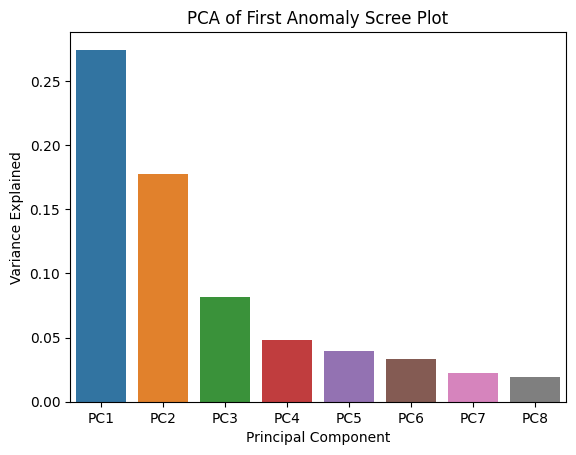

In [37]:
sns.barplot(x=['PC'+str(i+1)for i in range(len(fs_var_exp))],
            y=fs_var_exp)

plt.ylabel('Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA of First Anomaly Scree Plot')

plt.show()

In [38]:
cumm_var = itertools.accumulate(fs_var_exp)
print(list(cumm_var))

[0.2742897375703286, 0.4516714566008165, 0.5331555191540949, 0.5809394556819738, 0.6200874716299813, 0.6536576288784031, 0.6758306215701877, 0.6952998496247538]


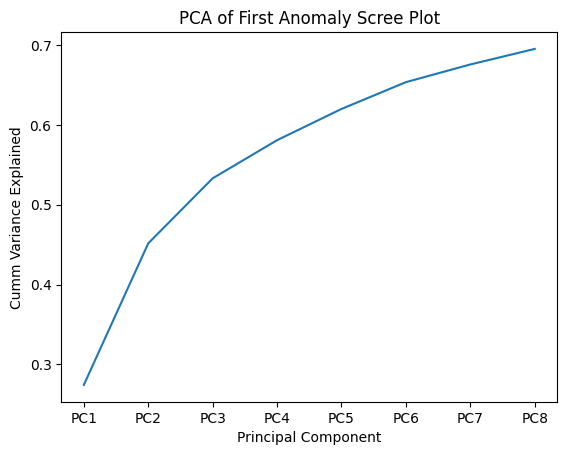

In [39]:
cumm_var = itertools.accumulate(fs_var_exp)
sns.lineplot(x=['PC'+str(i+1)for i in range(len(fs_var_exp))],
            y=cumm_var)

plt.ylabel('Cumm Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA of First Anomaly Scree Plot')

plt.show()

In [40]:
PCA_First_Anomaly = pd.DataFrame(data = PCA_First_Anomaly)
PCA_First_Anomaly.columns = ['PC' + str(int(i)+1) for i in PCA_First_Anomaly.columns]

print(PCA_First_Anomaly.head())

         PC1        PC2        PC3        PC4        PC5        PC6  \
0  -2.557396   1.730005  40.043153  12.337324  25.338566  19.021549   
1 -32.370424  -1.402466  25.696704 -17.527489  34.862161   6.364763   
2  13.149988  20.613347 -44.592741 -15.499898 -27.940321 -23.209711   
3  -5.509475  -4.708284   7.530835 -23.032459   9.967634  -7.501622   
4   8.928542  -4.765001  -5.209031  11.843352  -0.647840   2.306456   

         PC7        PC8  
0  14.717672   5.246030  
1  16.663866 -11.755042  
2  -2.886487   2.316699  
3 -10.181061 -16.921758  
4  -7.491365  -7.477571  


## Second Anomaly

In [41]:
second_pca = PCA(n_components=8, random_state=42)
PCA_Second_Anomaly = second_pca.fit_transform(Second_Anomaly)

# variance explaned (cumulative)
ss_var_exp = second_pca.explained_variance_ratio_
print(f'\nVariance explained : {ss_var_exp}\n')


Variance explained : [0.31710701 0.17667518 0.08805836 0.04065095 0.03536976 0.03281299
 0.02140876 0.0171595 ]



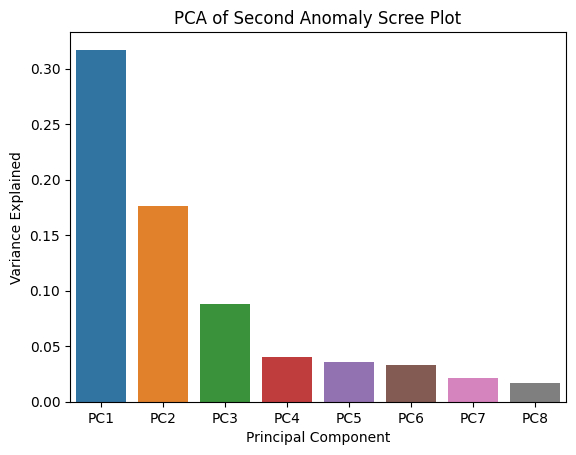

In [42]:
sns.barplot(x=['PC'+str(i+1)for i in range(len(ss_var_exp))],
            y=ss_var_exp)

plt.ylabel('Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA of Second Anomaly Scree Plot')

plt.show()

In [43]:
cumm_var = itertools.accumulate(ss_var_exp)
print(list(cumm_var))

[0.31710701400702146, 0.49378218966910936, 0.5818405459913962, 0.6224914914776231, 0.6578612526324982, 0.6906742441887169, 0.7120830019873646, 0.7292425012920665]


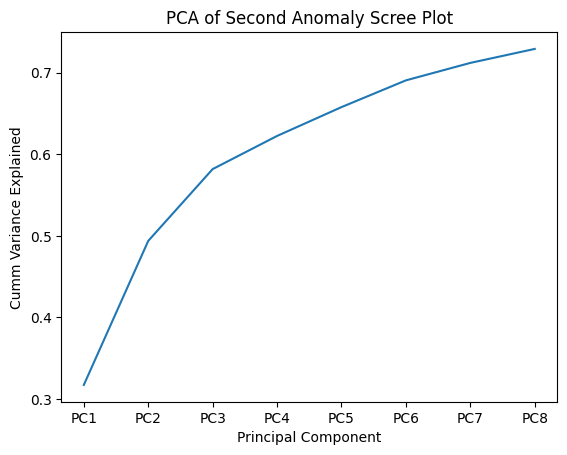

In [44]:
cumm_var = itertools.accumulate(ss_var_exp)

sns.lineplot(x=['PC'+str(i+1)for i in range(len(ss_var_exp))],
            y=[i for i in cumm_var])

plt.ylabel('Cumm Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA of Second Anomaly Scree Plot')

plt.show()

In [45]:
PCA_Second_Anomaly = pd.DataFrame(data = PCA_Second_Anomaly)
PCA_Second_Anomaly.columns = ['PC' + str(int(i)+1) for i in PCA_Second_Anomaly.columns]

print(PCA_Second_Anomaly.head())

         PC1         PC2        PC3        PC4        PC5        PC6  \
0  25.898856   17.932059  27.840624  12.462850 -23.254414 -24.475028   
1  25.357209 -112.981600  97.617484  38.560400  18.068489  -0.286134   
2 -51.216394   41.608374 -64.897467 -22.259298   8.893499  14.700796   
3 -34.125455   86.029056 -39.286225   4.557098  -1.111126  18.858628   
4   0.181145   50.612346 -33.035708  16.614499 -25.416442   3.708778   

         PC7        PC8  
0 -11.161910   9.959738  
1  24.503944  19.587512  
2 -11.765268   3.155757  
3 -11.646867   4.027053  
4 -14.753773  -6.771744  


# Correlation Coefficient

## First Sample

In [46]:
PCA_First_Anomaly.index = First_FF_6_Factors.index

First_Sample = pd.concat([PCA_First_Anomaly,
                         First_FF_6_Factors],
                         axis=1)

First_Sample.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,,,,,,,,,
1980-01,-2.557396,1.730005,40.043153,12.337324,25.338566,19.021549,14.717672,5.246030,5.51,1.83,1.75,-1.70,1.64,7.55
1980-02,-32.370424,-1.402466,25.696704,-17.527489,34.862161,6.364763,16.663866,-11.755042,-1.22,-1.57,0.61,0.04,2.68,7.88
1980-03,13.149988,20.613347,-44.592741,-15.499898,-27.940321,-23.209711,-2.886487,2.316699,-12.90,-6.93,-1.01,1.46,-1.19,-9.55
1980-04,-5.509475,-4.708284,7.530835,-23.032459,9.967634,-7.501622,-10.181061,-16.921758,3.97,1.05,1.06,-2.10,0.29,-0.43
1980-05,8.928542,-4.765001,-5.209031,11.843352,-0.647840,2.306456,-7.491365,-7.477571,5.26,2.11,0.38,0.34,-0.31,-1.12


In [47]:
First_Sample.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Mkt-RF,SMB,HML,RMW,CMA,Mom
PC1,1.000000e+00,-2.362132e-17,4.207898e-17,-1.093013e-17,-1.592918e-17,-5.290415e-17,-4.597347e-17,7.382674e-17,0.302129,0.512358,0.327884,-0.426761,0.151399,-0.702312
PC2,-2.362132e-17,1.000000e+00,-2.273488e-18,-1.484425e-18,-8.282007e-17,-2.025599e-17,-3.813511e-18,5.203407e-17,-0.490374,-0.297921,0.777612,0.540231,0.701497,-0.089309
PC3,4.207898e-17,-2.273488e-18,1.000000e+00,2.901965e-17,1.693793e-17,6.405949e-17,-4.883052e-17,2.959388e-17,-0.032921,0.417111,0.112310,-0.380968,0.272761,0.582191
PC4,-1.093013e-17,-1.484425e-18,2.901965e-17,1.000000e+00,-3.718673e-16,-1.194807e-16,-1.069649e-16,5.457256e-17,0.193751,0.380442,0.020669,0.302183,-0.078836,0.062883
PC5,-1.592918e-17,-8.282007e-17,1.693793e-17,-3.718673e-16,1.000000e+00,7.989098e-16,-2.142451e-16,-2.565605e-16,0.218303,-0.074881,0.000729,0.169774,-0.285668,0.020389
PC6,-5.290415e-17,-2.025599e-17,6.405949e-17,-1.194807e-16,7.989098e-16,1.000000e+00,4.649124e-17,-1.142429e-16,0.026426,-0.051622,0.020480,0.062127,0.074435,-0.087156
PC7,-4.597347e-17,-3.813511e-18,-4.883052e-17,-1.069649e-16,-2.142451e-16,4.649124e-17,1.000000e+00,3.582733e-16,0.108134,-0.097650,0.033228,-0.063380,0.199461,0.015763
PC8,7.382674e-17,5.203407e-17,2.959388e-17,5.457256e-17,-2.565605e-16,-1.142429e-16,3.582733e-16,1.000000e+00,-0.030108,0.010133,0.010719,0.027237,-0.141562,0.026652
Mkt-RF,3.021286e-01,-4.903737e-01,-3.292139e-02,1.937506e-01,2.183026e-01,2.642612e-02,1.081343e-01,-3.010773e-02,1.000000,0.228320,-0.211752,-0.257810,-0.376312,-0.164010
SMB,5.123580e-01,-2.979212e-01,4.171105e-01,3.804422e-01,-7.488130e-02,-5.162185e-02,-9.764962e-02,1.013330e-02,0.228320,1.000000,-0.061861,-0.416500,-0.050312,-0.031067


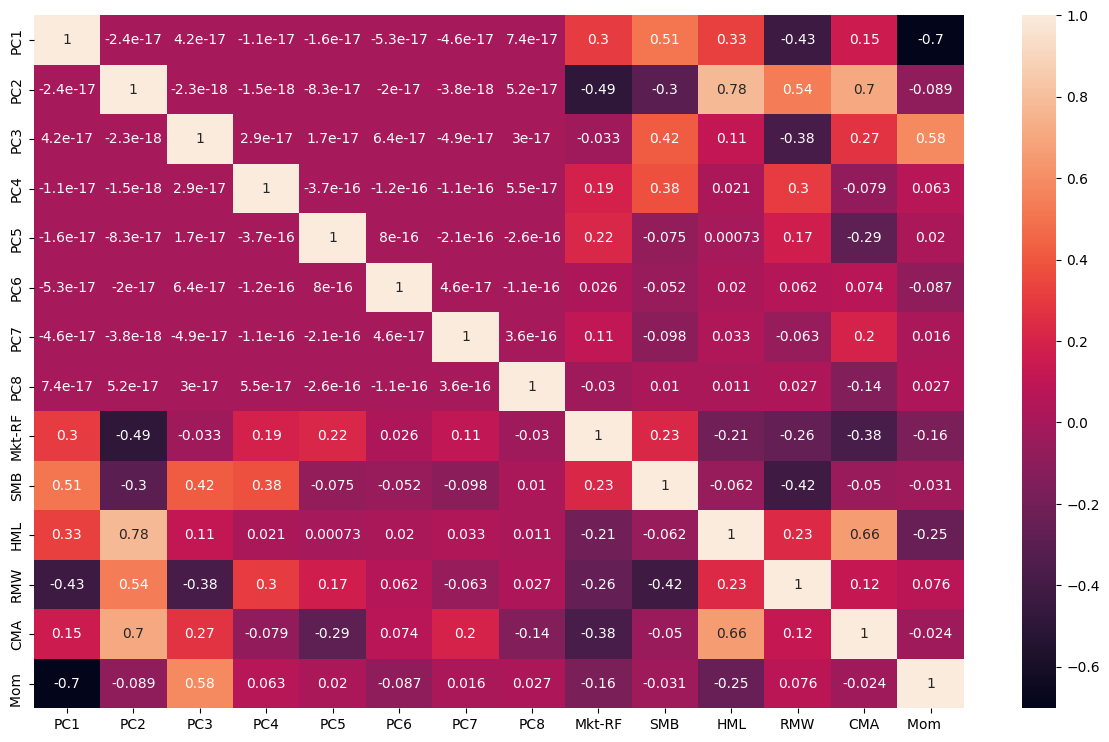

In [48]:
plt.figure(figsize=(15,9))

sns.heatmap(First_Sample.corr(), annot=True)

plt.show()

## Second Sample

In [49]:
PCA_Second_Anomaly.index = Second_FF_6_Factors.index

Second_Sample = pd.concat([PCA_Second_Anomaly,
                         Second_FF_6_Factors],
                         axis=1)

Second_Sample.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Mkt-RF,SMB,HML,RMW,CMA,Mom
Date,,,,,,,,,,,,,,
2000-01,25.898856,17.932059,27.840624,12.462850,-23.254414,-24.475028,-11.161910,9.959738,-4.74,4.44,-1.91,-6.31,4.75,1.92
2000-02,25.357209,-112.981600,97.617484,38.560400,18.068489,-0.286134,24.503944,19.587512,2.45,18.34,-9.70,-18.73,-0.36,18.20
2000-03,-51.216394,41.608374,-64.897467,-22.259298,8.893499,14.700796,-11.765268,3.155757,5.20,-15.35,8.17,11.82,-1.65,-6.83
2000-04,-34.125455,86.029056,-39.286225,4.557098,-1.111126,18.858628,-11.646867,4.027053,-6.40,-5.01,7.26,7.66,5.65,-8.39
2000-05,0.181145,50.612346,-33.035708,16.614499,-25.416442,3.708778,-14.753773,-6.771744,-4.42,-3.84,4.81,4.17,1.30,-8.98


In [50]:
Second_Sample.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Mkt-RF,SMB,HML,RMW,CMA,Mom
PC1,1.000000e+00,-8.831319e-17,-2.063851e-16,-5.131135e-17,-5.500886e-17,-8.200836e-18,-1.441261e-17,2.448806e-17,0.570951,0.545994,0.204702,-0.496905,-0.023256,-0.708972
PC2,-8.831319e-17,1.000000e+00,6.464113e-16,2.101617e-16,4.721983e-17,-2.045043e-16,2.228332e-16,-1.447876e-16,-0.296705,-0.102296,0.799409,0.630932,0.664590,-0.183070
PC3,-2.063851e-16,6.464113e-16,1.000000e+00,-8.689889e-17,1.325751e-16,1.655439e-17,7.819102e-17,-1.454971e-16,-0.014338,0.571787,0.100959,-0.314502,0.293848,0.564704
PC4,-5.131135e-17,2.101617e-16,-8.689889e-17,1.000000e+00,7.492078e-16,-7.708227e-16,4.140150e-17,-3.952250e-16,-0.131253,0.070688,0.016921,-0.126574,0.378516,-0.049709
PC5,-5.500886e-17,4.721983e-17,1.325751e-16,7.492078e-16,1.000000e+00,-1.754089e-16,3.448527e-16,-2.504080e-16,0.134562,0.297738,0.052822,0.105251,0.018437,0.046325
PC6,-8.200836e-18,-2.045043e-16,1.655439e-17,-7.708227e-16,-1.754089e-16,1.000000e+00,-2.062625e-16,-1.576248e-16,0.144258,0.008606,0.032079,0.197864,-0.105059,-0.063169
PC7,-1.441261e-17,2.228332e-16,7.819102e-17,4.140150e-17,3.448527e-16,-2.062625e-16,1.000000e+00,2.813840e-16,-0.041847,0.095185,-0.011604,0.095216,-0.219354,0.001421
PC8,2.448806e-17,-1.447876e-16,-1.454971e-16,-3.952250e-16,-2.504080e-16,-1.576248e-16,2.813840e-16,1.000000e+00,0.084575,-0.011098,0.033696,-0.004859,0.165868,0.057047
Mkt-RF,5.709514e-01,-2.967053e-01,-1.433754e-02,-1.312532e-01,1.345616e-01,1.442583e-01,-4.184723e-02,8.457498e-02,1.000000,0.275247,0.002241,-0.373791,-0.237763,-0.379081
SMB,5.459939e-01,-1.022960e-01,5.717873e-01,7.068798e-02,2.977382e-01,8.606290e-03,9.518453e-02,-1.109767e-02,0.275247,1.000000,0.047946,-0.494034,0.061048,-0.011119


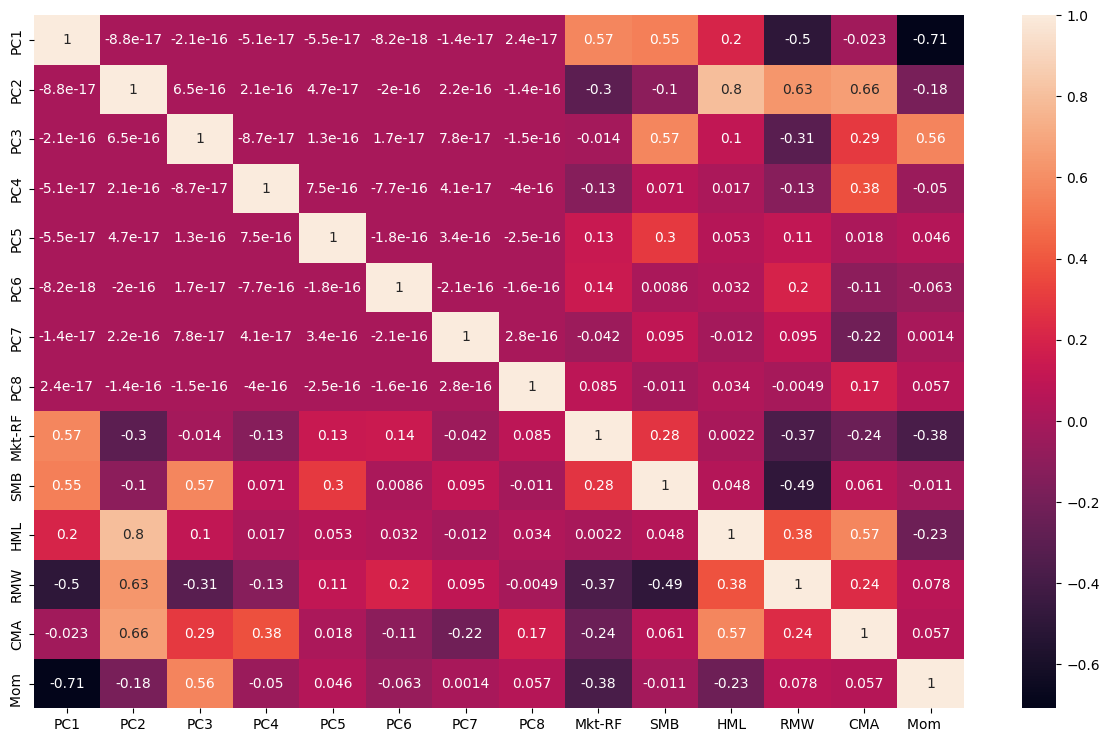

In [51]:
plt.figure(figsize=(15,9))

sns.heatmap(Second_Sample.corr(), annot=True)

plt.show()